<a href="https://colab.research.google.com/github/bineee39/first-repository/blob/master/mainquest_1112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주택 가격 예측하기!

메인퀘스트에 오신 것을 환영합니다!

이번 퀘스트의 목표는 여러 특성들을 종합적으로 고려하여 가장 주택 가격을 잘 예측하는 회귀모델을 만드는 것입니다.

- 예측할 값(y): SalePrice
- 평가지표: RMSE

퀘스트 진행 방식:

1. Code 란에서 테스트 노트북을 Copy&Edit 하여 작업!
2. 테스트 노트북을 submit 하여 리더보드에 정상적으로 등록되는지 확인하기
3. 자유롭게 모델을 발전시켜 좋은 성적 거두기!
4. 정상적으로 submit하고, 다음 구글폼에 이름/노트북주소/닉네임 등록!!!
- https://docs.google.com/forms/d/e/1FAIpQLSc0kXVZ9PRLbjsxBysCSSYLDiU4Hd9DLTvFrCFep4HLZLbL8w/viewform?usp=header

예시 형식:
~~~
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
~~~

### 데이터 확인 및 불러오기

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train_df = pd.read_csv('./train (2).csv')
test_df = pd.read_csv('./test (2).csv')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [ ]:
train_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000


In [ ]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.00000,950.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1160.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,728.528253,56.97774,70.058947,10336.357877,6.105308,5.595890,1971.201199,1985.021404,102.938793,442.928938,...,90.971747,47.554795,22.715753,3.219178,16.332192,2.955479,51.279110,6.306507,2007.830479,180194.401541
std,415.393477,42.29068,24.762405,8784.854640,1.373032,1.127388,30.362445,20.693264,176.142597,462.364719,...,123.811685,68.250085,63.042971,29.241246,58.828037,41.648504,552.357575,2.715955,1.323583,78869.201529
min,1.000000,20.00000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,373.750000,20.00000,59.000000,7560.000000,5.000000,5.000000,1954.000000,1966.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129500.000000
50%,720.500000,50.00000,69.000000,9446.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,374.500000,...,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1086.250000,70.00000,80.000000,11601.500000,7.000000,6.000000,2001.000000,2004.000000,168.000000,714.500000,...,165.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213062.500000
max,1460.000000,190.00000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1170.000000,5644.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: xlabel='Id', ylabel='SalePrice'>

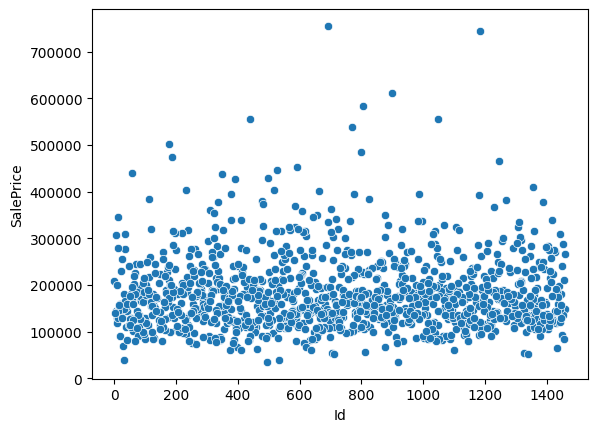

In [ ]:
import seaborn as sns
sns.scatterplot(data=train_df, x='Id', y='SalePrice')

총 43개 범주형 칼럼의 전체 분포를 시각화합니다.


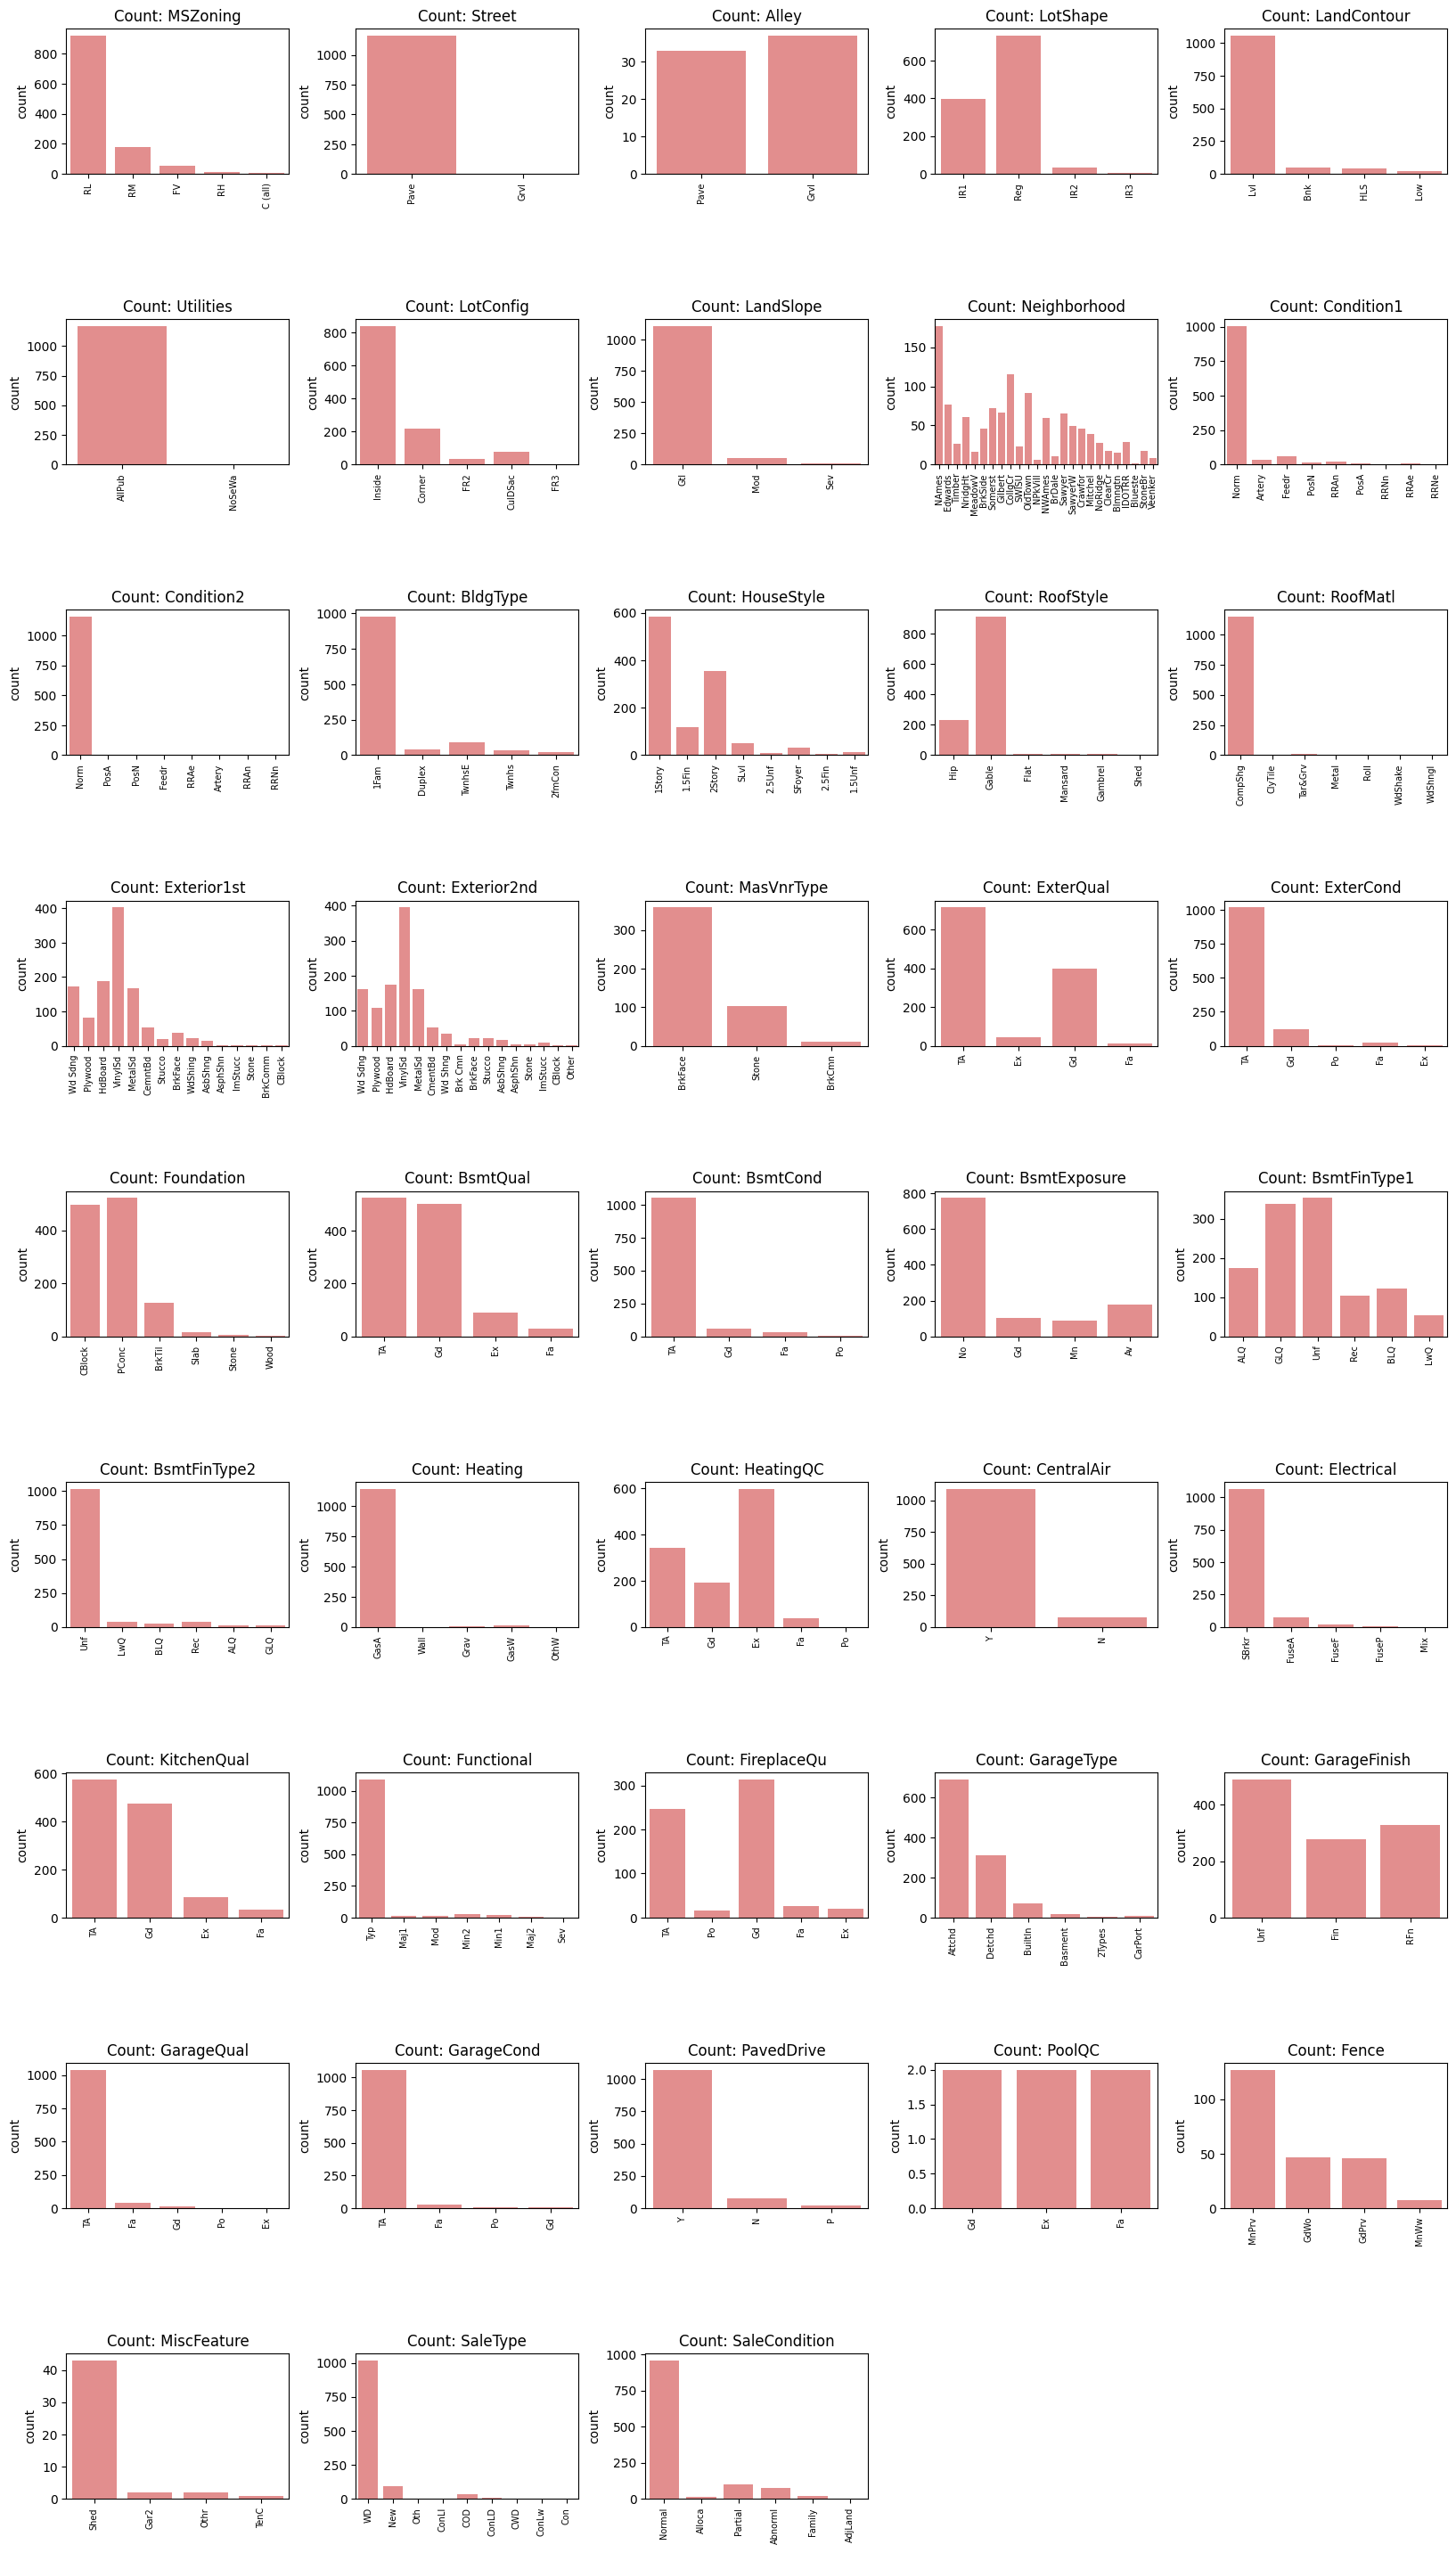

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 'Id' 칼럼 제거 및 데이터 복사
if 'Id' in train_df.columns:
    df_plot = train_df.drop('Id', axis=1)
else:
    df_plot = train_df.copy()

# 2. 모든 칼럼 리스트 및 범주형 칼럼 선택
all_cols = df_plot.columns
num_cols = df_plot.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_plot.select_dtypes(include=['object', 'category']).columns

# 3. 그래프 설정을 위한 레이아웃 계산 (범주형 칼럼만 시각화)
# 범주형 칼럼 수에 맞춰 행/열 수를 조정합니다.
n_cat = len(cat_cols)
n_cols = 5 # 한 줄에 5개의 그래프
n_rows = (n_cat + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4)) # 높이 조정
plt.subplots_adjust(hspace=1.0, wspace=0.3) # hspace 증가로 레이블 겹침 방지
axes = axes.flatten()

print(f"총 {n_cat}개 범주형 칼럼의 전체 분포를 시각화합니다.")

# 4. For 루프를 사용하여 전체 범주 분포 그래프 그리기
for i, col in enumerate(cat_cols):
    ax = axes[i]

    # 카운트 플롯 (모든 범주 표시)
    sns.countplot(data=df_plot, x=col, ax=ax, color='lightcoral')

    ax.set_title(f'Count: {col}', fontsize=12)
    ax.set_xlabel('')

    # X축 레이블 전체를 표시하기 위해 90도 회전 및 폰트 크기 조정
    ax.tick_params(axis='x', rotation=90, labelsize=7)

# 사용하지 않은 빈 Subplots 숨기기
for j in range(n_cat, n_rows * n_cols):
    axes[j].set_visible(False)

plt.show()

몇몇 칼럼은 한 데이터에 집중되어있는것으로 보인다. 이게 과연 진짜 의미있는 칼럼인지 의심되었음

In [ ]:
import pandas as pd

# 1. 범주형 칼럼 선택 (object 타입)
# 이전 단계에서 MSSubClass, MoSold, YrSold를 object로 변환했다면 자동으로 포함됩니다.
cat_cols = train_df.select_dtypes(include='object').columns

print("--- 범주형 칼럼별 최빈값(가장 높은 비율) 현황 ---")
print("칼럼명 | 최빈값 | 비율")
print("-" * 35)

# 전체 데이터셋의 크기
total_rows = len(train_df)

# 결과를 저장할 리스트
low_variance_summary = []

for col in cat_cols:
    # 1. 각 범주의 개수 계산
    value_counts = train_df[col].value_counts(dropna=False)

    # 2. 가장 많은 개수를 가진 범주와 그 개수를 추출
    most_frequent_value = value_counts.index[0]
    most_frequent_count = value_counts.iloc[0]

    # 3. 비율 계산 (퍼센트)
    percentage = (most_frequent_count / total_rows) * 100

    # 4. 결과 출력 및 저장
    print(f"{col:<15} | {most_frequent_value:<6} | {percentage:.2f}%")

    low_variance_summary.append({
        'Column': col,
        'Mode': most_frequent_value,
        'Percentage': percentage
    })


--- 범주형 칼럼별 최빈값(가장 높은 비율) 현황 ---
칼럼명 | 최빈값 | 비율
-----------------------------------
MSZoning        | RL     | 78.77%
Street          | Pave   | 99.57%
Alley           | nan    | 94.01%
LotShape        | Reg    | 62.67%
LandContour     | Lvl    | 90.41%
Utilities       | AllPub | 99.91%
LotConfig       | Inside | 71.92%
LandSlope       | Gtl    | 94.95%
Neighborhood    | NAmes  | 15.15%
Condition1      | Norm   | 86.04%
Condition2      | Norm   | 99.06%
BldgType        | 1Fam   | 83.56%
HouseStyle      | 1Story | 49.91%
RoofStyle       | Gable  | 78.08%
RoofMatl        | CompShg | 98.29%
Exterior1st     | VinylSd | 34.50%
Exterior2nd     | VinylSd | 33.82%
MasVnrType      | nan    | 59.42%
ExterQual       | TA     | 61.22%
ExterCond       | TA     | 87.24%
Foundation      | PConc  | 44.69%
BsmtQual        | TA     | 44.78%
BsmtCond        | TA     | 89.98%
BsmtExposure    | No     | 66.18%
BsmtFinType1    | Unf    | 30.22%
BsmtFinType2    | Unf    | 87.16%
Heating         | GasA   | 98

총 37개 수치형 칼럼의 분포를 히스토그램으로 시각화합니다.


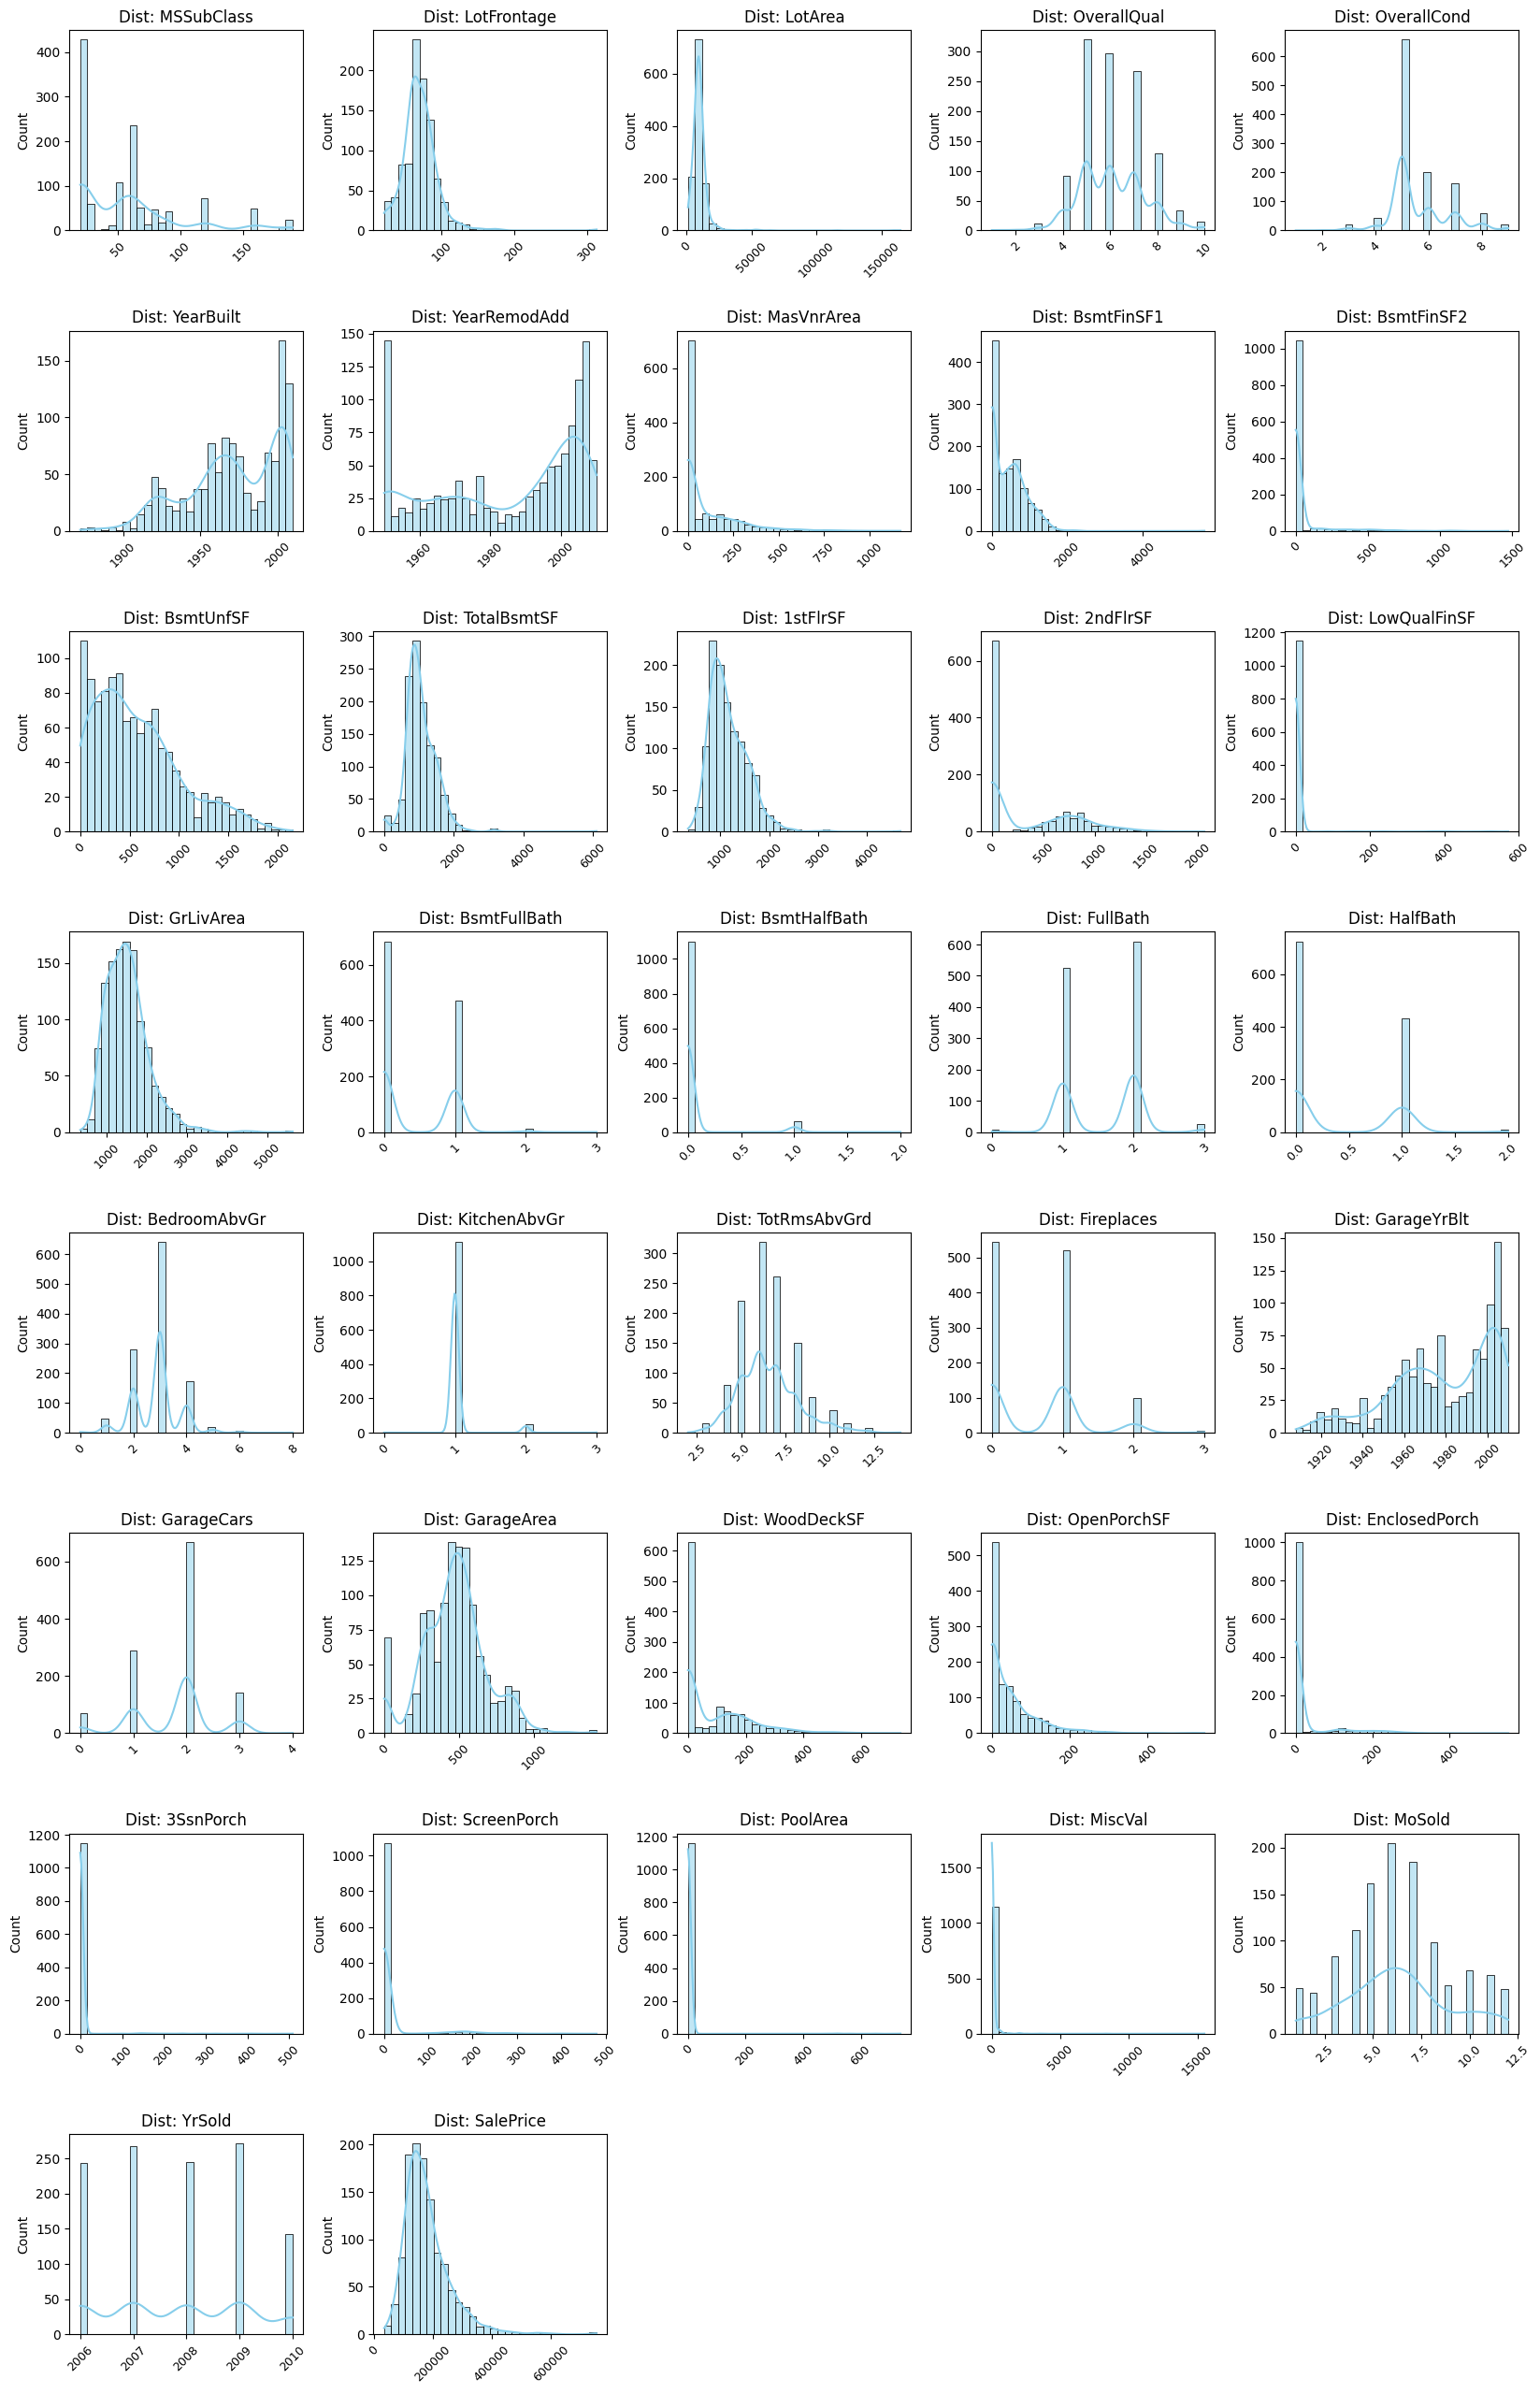

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 'Id' 칼럼 제거 및 데이터 복사 (안전을 위해)
if 'Id' in train_df.columns:
    df_plot = train_df.drop('Id', axis=1)
else:
    df_plot = train_df.copy()

# 2. 수치형 칼럼 선택 (int64, float64 타입)
num_cols = df_plot.select_dtypes(include=['int64', 'float64']).columns

# 3. 그래프 설정을 위한 레이아웃 계산
n_num = len(num_cols)
n_cols = 5 # 한 줄에 5개의 그래프
n_rows = (n_num + n_cols - 1) // n_cols

# fig, axes 객체 생성 및 크기 설정
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
axes = axes.flatten() # axes 배열을 1차원으로 만듭니다.

print(f"총 {n_num}개 수치형 칼럼의 분포를 히스토그램으로 시각화합니다.")

# 4. For 루프를 사용하여 히스토그램 그리기
for i, col in enumerate(num_cols):
    ax = axes[i]

    # 히스토그램 (kde=True는 커널 밀도 추정 곡선을 함께 그려 분포 형태 파악에 도움을 줍니다.)
    sns.histplot(df_plot[col].dropna(), kde=True, ax=ax, bins=30, color='skyblue')

    ax.set_title(f'Dist: {col}', fontsize=12)
    ax.set_xlabel('')

    # X축 레이블 겹침 방지 및 크기 조정
    ax.tick_params(axis='x', rotation=45, labelsize=9)

# 사용하지 않은 빈 Subplots 숨기기
for j in range(n_num, n_rows * n_cols):
    axes[j].set_visible(False)

plt.show()

In [ ]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

,0
LotFrontage,218
Alley,1098
MasVnrType,694
MasVnrArea,8
BsmtQual,23
BsmtCond,23
BsmtExposure,24
BsmtFinType1,23
BsmtFinType2,24
Electrical,1


In [ ]:
train_id = train_df['Id']
test_id = test_df['Id']

--- SalePrice와 상관관계 높은 칼럼 ---
OverallQual      0.785111
GrLivArea        0.710178
GarageCars       0.632622
GarageArea       0.618311
1stFlrSF         0.597729
TotalBsmtSF      0.595882
FullBath         0.577860
TotRmsAbvGrd     0.548795
YearRemodAdd     0.504817
YearBuilt        0.501762
Fireplaces       0.475965
GarageYrBlt      0.472533
MasVnrArea       0.469261
BsmtFinSF1       0.379606
2ndFlrSF         0.333176
LotFrontage      0.321389
WoodDeckSF       0.308081
OpenPorchSF      0.294805
HalfBath         0.279331
LotArea          0.251558
BsmtFullBath     0.209688
BsmtUnfSF        0.197267
BedroomAbvGr     0.186202
ScreenPorch      0.133130
KitchenAbvGr    -0.132859
PoolArea         0.114399
EnclosedPorch   -0.110306
MSSubClass      -0.060677
OverallCond     -0.059862
MoSold           0.049252
3SsnPorch        0.028724
MiscVal         -0.021824
YrSold          -0.018160
LowQualFinSF    -0.007937
BsmtHalfBath    -0.005524
BsmtFinSF2      -0.005127
Id               0.003233
Name: Sa

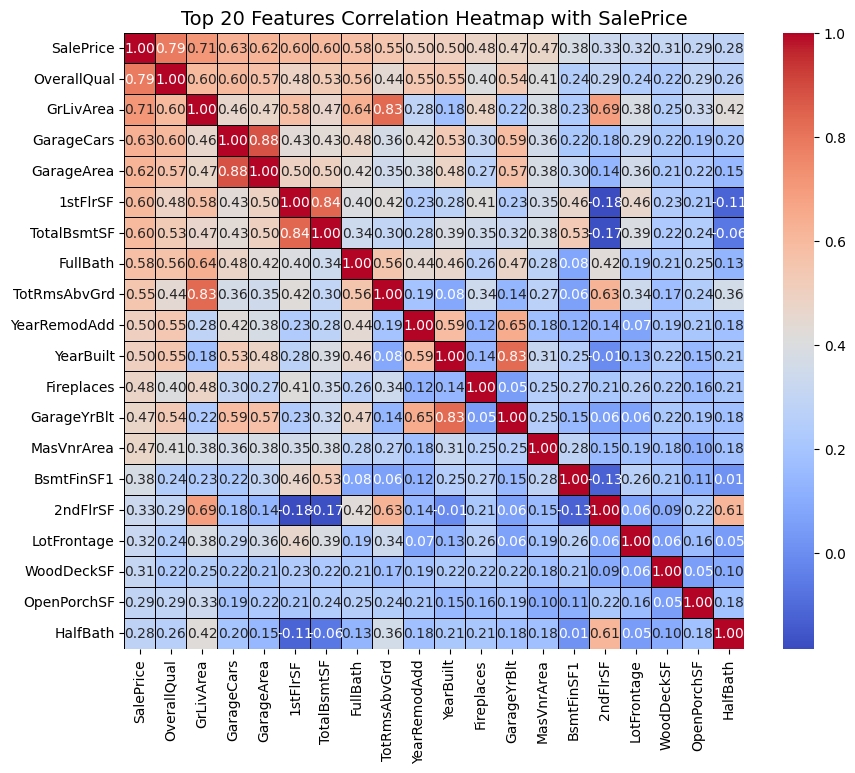

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

corrmat = train_df.corr(numeric_only=True)
salecorr = corrmat['SalePrice'].sort_values(ascending=False, key=abs)

print("--- SalePrice와 상관관계 높은 칼럼 ---")
print(salecorr.iloc[1:])

# 3. 상관관계 히트맵 시각화 (Top 20 변수)

top_cols = salecorr.index[:20]
top_corr_mat = train_df[top_cols].corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    top_corr_mat,
    annot=True,         # 숫자 값 표시
    fmt=".2f",          # 소수점 둘째 자리
    cmap='coolwarm',
    linewidths=0.5,     # 선 간격
    linecolor='black'
)
plt.title(f'Top {top_k} Features Correlation Heatmap with SalePrice', fontsize=14)
plt.show()

In [ ]:
# 1. Id/SalePrice 분리 및 로그 변환 (y_train 준비)
train_id = train_df['Id']
test_id = test_df['Id']

y_train = np.log1p(train_df['SalePrice'])
train_df = train_df.drop(['Id', 'SalePrice'], axis=1)
test_df = test_df.drop('Id', axis=1)

# 2. train/test 병합 (전처리 일관성을 위해)
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)

# 3. 불필요 칼럼 제거
low_variance_cols = [
    'Utilities', 'Street', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', # 범주형
    '3SsnPorch', 'MiscVal', 'LowQualFinSF', 'BsmtHalfBath', 'BsmtFinSF2'  # 수치형
]
#수치형 제거한 이유도 범주형과 같다. 한쪽으로 급격하게 치우친 형태가 과하다고 판단한 칼럼을 제거했다
all_data = all_data.drop(low_variance_cols, axis=1)

# 4. 타입 변경 (숫자지만 범주형으로 취급할 칼럼)
for col in ['MSSubClass', 'YrSold', 'OverallCond']:
    all_data[col] = all_data[col].astype('object')
#각각이 건물등급코드, 판매연도(시간이지만 범주형으로 분류하는게 맞다),전반적인 상태 평가를 의미하므로 범주형으로 변환함

타깃데이터는 오른쪽르고 꼬리가 긴 형태를 띄고있다. 차후 사용할 선형모델에서 타깃의 정규성은 중요하므로(트리기반은 상관없다) 변환하였다.

In [ ]:
all_data['MoSold'] = all_data['MoSold'].astype(int)

# Sin/Cos Transformatio
all_data['MoSold_sin'] = np.sin(2 * np.pi * all_data['MoSold'] / 12)
all_data['MoSold_cos'] = np.cos(2 * np.pi * all_data['MoSold'] / 12)

# 원본제거
all_data = all_data.drop('MoSold', axis=1)

칼럼이 의미하는게 월별 판매라 필요한지는 모르겠으나 배웠으므로 순환성을 부여

In [109]:

outlier_indices = all_data[:N_train][all_data[:N_train]['GrLivArea'] > 4000].index

print(f"이상치 행의 개수: {len(outlier_indices)}개")

이상치 행의 개수: 0개


이 칼럼이 타깃과 가장 높은 상관계수를 가지고있어서 혹시모를 이상치를 제거했다 (실수로 다 끝나고 한번 더 이 셀을 돌려서 2개가 0개로 나타나는데, 원래는  2개로 나타났다)


In [ ]:
#이상치제거
N_train = len(y_train)
outlier_index = all_data[:N_train][all_data[:N_train]['GrLivArea'] > 4000].index

all_data = all_data.drop(outlier_index).reset_index(drop=True)
y_train = y_train.drop(outlier_index).reset_index(drop=True)

print("--- 이상치 제거 및 초기 전처리 완료 ---")
print(f"이상치 2개 행이 제거되었습니다. 현재 훈련 데이터 수: {len(y_train)}개")


--- 이상치 제거 및 초기 전처리 완료 ---
이상치 2개 행이 제거되었습니다. 현재 훈련 데이터 수: 1164개


In [ ]:
# 시설물 처리
none_cols = [
    'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'MiscFeature'
]

for col in none_cols:
    all_data[col] = all_data[col].fillna('None')

이 칼럼들의 none은 해당 시설이 존재하지 않다는 의미이므로 none도 하나의 값으로 처리해 집어넣었다

In [ ]:
remaining_cat_na = all_data.select_dtypes(include='object').isnull().sum()
mode_cols = remaining_cat_na[remaining_cat_na > 0].index.tolist()
for col in mode_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

시설 유무가 아닌 데이터는 최빈값으로 채웠다

In [ ]:
zero_cols = [
    'GarageYrBlt', 'MasVnrArea',
    'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
    'GarageCars', 'GarageArea'
]

In [ ]:
for col in zero_cols:
    all_data[col] = all_data[col].fillna(0)

print("NaN을 0으로 대체해야 하는 수치형 칼럼 처리가 완료되었습니다.")

NaN을 0으로 대체해야 하는 수치형 칼럼 처리가 완료되었습니다.


수치형 변수를 전처리하는 과정이다
칼럼들은 대부분 주택 내 특정 시설의 크기, 면적, 또는 연도를 나타내는 변수이므로 이러한 변수의 none값은 0으로 처리했다.

In [ ]:
remaining_num_na = all_data.select_dtypes(include=['int64', 'float64']).isnull().sum()
median_cols = remaining_num_na[remaining_num_na > 0].index.tolist()
#나머지칼럼추출
N_train = len(y_train)

# 위처럼 주택 내 특정 시설의 크기가 아닌 값들은 누락일 가능성이 높으므로 중앙값으로 대체
for col in median_cols:
    median_val = all_data[:N_train][col].median()
    all_data[col] = all_data[col].fillna(median_val)

print(f"중앙값으로 대체된 수치형 칼럼: {median_cols}")

중앙값으로 대체된 수치형 칼럼: ['LotFrontage']


위처럼 주택 내 특정 시설의 크기가 아닌 값들은 누락일 가능성이 높으므로 중앙값으로 대체

In [ ]:
qual_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0, np.nan: 0}
# None은 이전에 fillna('None')을 통해 채워졌거나, 결측치로 남아있던 경우를 대비하여 0으로 매핑
.
bsmt_fin_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0, np.nan: 0}

범주형 칼럼중 ExterQual(외장품질),BsmtQual(지하실높이) 같은 칼럼은 등급을 가지고 있으므로 이러한 성격을 부여하고자 범주형->Ordinal 인코딩을 하기위한 작업

In [ ]:
qual_cols = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
    'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC'
]

# 지하실 마감 유형
fin_cols = ['BsmtFinType1', 'BsmtFinType2']

for col in qual_cols:
    if col in all_data.columns:
        all_data[col] = all_data[col].map(qual_map).fillna(0)
for col in fin_cols:
    all_data[col] = all_data[col].map(bsmt_fin_map).fillna(0)

print("순서형 범주형 칼럼이 숫자로 인코딩되었습니다.")

순서형 범주형 칼럼이 숫자로 인코딩되었습니다.


qual_cols는 품질/상태 칼럼 리스트->Ex부터 Po까지 등급을 가지고있음

fin_cols는 각각 칼럼이 첫번째 마감구역의 품질 유형, 두번째 마감구역의 품질유형을 뜻하고 각각 가진 데이터가 최상급거주/평균거주 와 저품질/미완성을 가지고있으므로 묶었다

그래서 등급을 가진 칼럼들을 위 셀의 기준처럼 인코딩해주었다

In [ ]:
all_data['TotalSF'] = all_data['GrLivArea'] + all_data['TotalBsmtSF']

지상 면적(GrLivArea) + 지하실 면적(TotalBsmtSF) 합쳐서 최대한 차원 줄임

In [ ]:
#주택연식
all_data['House_Age'] = all_data['YrSold'].astype(int) - all_data['YearBuilt']

# 리모델링 여부
all_data['Remodeled'] = (all_data['YearRemodAdd'] != all_data['YearBuilt']).astype(int)

all_data = all_data.drop(['YearBuilt', 'YearRemodAdd'], axis=1)

주택 연식이라는 칼럼을 만들고, 리모델링 여부 칼럼을 추가(이 데이터가 담고있는 데이터가 더 효율적이고 직관적이다), 나머지 사용한 칼럼은제거

나머지는 대체되어도 상관없는 데이터였지만 YrSold는 판매 시점의 시장 정보를 담고있고, 범주형이므로 제거하지 않음

In [ ]:
all_data['Total_Bathrooms'] = (
    all_data['FullBath'] + (0.5 * all_data['HalfBath'])
)

print("Total_Bathrooms 특성 공학이 수정되어 실행되었습니다.")

Total_Bathrooms 특성 공학이 수정되어 실행되었습니다.


각 칼럼은 지상층에 완비된 욕실, 반욕실을 의미하므로 그냥 총 욕실개수 칼럼으로 만들었다.

그러나 상관관계가 높은 칼럼이라 지우진 않았음(0.58정도,,)

In [ ]:
#원핫인코딩
all_data = pd.get_dummies(all_data, drop_first=True)
print(f"One-Hot Encoding 후 전체 칼럼 수: {all_data.shape[1]}")

One-Hot Encoding 후 전체 칼럼 수: 218


In [ ]:
#분리
N_train = len(y_train)

X_train = all_data[:N_train]
X_test = all_data[N_train:]

## 학습

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("수치형 특성 표준 스케일링 완료.")

수치형 특성 표준 스케일링 완료.


/tmp/ipython-input-1490824514.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
/tmp/ipython-input-1490824514.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numerical_features] = scaler.transform(X_test[numerical_features])


범주형(원핫인코딩) 제외, 수치형만 표준화작업( 선형모델때문에)

## 라쏘회귀 (선형)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lasso_params = {'alpha': [0.0003, 0.0005, 0.0008, 0.001, 0.0015, 0.002]}

lasso_grid = GridSearchCV(
    Lasso(max_iter=10000, random_state=42), #반복횟수많은이유->수렴오류방지
    param_grid=lasso_params,
    scoring='neg_mean_squared_error', #오차가 평가지표이므로 작을수록 좋으니 마이너스붙임
    cv=kf,
    n_jobs=-1
)

lasso_grid.fit(X_train, y_train)

best_lasso_alpha = lasso_grid.best_params_['alpha']
best_lasso_score = np.sqrt(-lasso_grid.best_score_)
train_rmse_score = rmse(y_train, lasso_grid.predict(X_train))

print(f" Lasso 모델 최적화 완료")
print(f"최적 alpha (규제 강도): {best_lasso_alpha}")
print(f"교차 검증 최적 RMSE (CV Score): {best_lasso_score:.4f}")
print(f"훈련 데이터 RMSE: {train_rmse_score:.4f}")

 Lasso 모델 최적화 완료
최적 alpha (규제 강도): 0.0005
교차 검증 최적 RMSE (CV Score): 0.1176
훈련 데이터 RMSE: 0.1027


하면서 아까 sin/cos변환했는데 셔플해도되는지 -> 시계열 예측이 아니니까 괜찮다

또한 수렴 오류 방지 부연설명 : 지정된 최대 반복 횟수(max_iter) 내에 이 최적의 상태(최소 손실 값)에 도달하지 못했을 때 발생하는게 수렴 오류. 이를 방지하고자 최대한 많이 반복함. 대신 일정 수준에 다다라 최적점에 도달했다고 판단하면 그만둔다


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
kf = KFold(n_splits=5, shuffle=True, random_state=42)

ridge_params = {'alpha': [1, 5, 10, 20, 50, 100, 200]}

ridge_grid = GridSearchCV(
    Ridge(random_state=42),
    param_grid=ridge_params,
    scoring='neg_mean_squared_error',
    cv=kf,
    n_jobs=-1
)

ridge_grid.fit(X_train, y_train)

best_ridge_alpha = ridge_grid.best_params_['alpha']
best_ridge_score = np.sqrt(-ridge_grid.best_score_)
train_rmse_score = rmse(y_train, ridge_grid.predict(X_train))

print(f" Ridge 모델 최적화 완료")
print(f"최적 alpha (규제 강도): {best_ridge_alpha}")
print(f"교차 검증 최적 RMSE (CV Score): {best_ridge_score:.4f}")
print(f"훈련 데이터 RMSE: {train_rmse_score:.4f}")

 Ridge 모델 최적화 완료
최적 alpha (규제 강도): 10
교차 검증 최적 RMSE (CV Score): 0.1188
훈련 데이터 RMSE: 0.0996


틀은 라쏘와 같으므로 설명 생략

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
kf = KFold(n_splits=5, shuffle=True, random_state=42)

xgb_params = {
    'n_estimators': [1000, 1500], # 트리의 개수
    'learning_rate': [0.05, 0.1], # 학습률(폭)
    'max_depth': [3, 4, 5],       # 트리의 최대 깊이
    'colsample_bytree': [0.6, 0.8], # 각 트리에서 사용할 피처 비율
    'subsample': [0.6, 0.8]         # 각 트리에서 사용할 데이터 샘플 비율
}

xgb_grid = GridSearchCV(
    XGBRegressor(random_state=42, objective='reg:squarederror'),
    param_grid=xgb_params,
    scoring='neg_mean_squared_error',
    cv=kf,
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)

best_xgb_params = xgb_grid.best_params_
best_xgb_score = np.sqrt(-xgb_grid.best_score_)
train_rmse_score = rmse(y_train, xgb_grid.predict(X_train))

print(f" XGBoost 모델 최적화 완료")
print(f"최적 파라미터: {best_xgb_params}")
print(f"교차 검증 최적 RMSE (CV Score): {best_xgb_score:.4f}")
print(f"훈련 데이터 RMSE: {train_rmse_score:.4f}")

 XGBoost 모델 최적화 완료
최적 파라미터: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.6}
교차 검증 최적 RMSE (CV Score): 0.1225
훈련 데이터 RMSE: 0.0371


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lgbm_params = {
    'n_estimators': [1000, 1500],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 5],
    'num_leaves': [30, 40], #각 결정 트리가 가질 수 있는 최대 leaf의 개수
}

lgbm_grid = GridSearchCV(
    LGBMRegressor(random_state=42, n_jobs=-1),
    param_grid=lgbm_params,
    scoring='neg_mean_squared_error',
    cv=kf,
    n_jobs=-1
)



lgbm_grid.fit(X_train, y_train)

best_lgbm_params = lgbm_grid.best_params_
best_lgbm_score = np.sqrt(-lgbm_grid.best_score_)
train_rmse_score = rmse(y_train, lgbm_grid.predict(X_train))

print(f" LightGBM 모델 최적화 완료")
print(f"최적 파라미터: {best_lgbm_params}")
print(f"교차 검증 최적 RMSE (CV Score): {best_lgbm_score:.4f}")
print(f"훈련 데이터 RMSE: {train_rmse_score:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3295
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 155
[LightGBM] [Info] Start training from score 12.017919
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
kf = KFold(n_splits=5, shuffle=True, random_state=42)

enet_params = {
    'alpha': [0.0003, 0.0005, 0.001], # 규제 강도
    'l1_ratio': [0.05, 0.1, 0.5]      # L1 규제의 비율 (0.1에 가까울수록 Ridge에 가까워짐)
}
enet_grid = GridSearchCV(
    ElasticNet(max_iter=10000, random_state=42),
    param_grid=enet_params,
    scoring='neg_mean_squared_error',
    cv=kf,
    n_jobs=-1
)

enet_grid.fit(X_train, y_train)

best_enet_params = enet_grid.best_params_
best_enet_score = np.sqrt(-enet_grid.best_score_)
train_rmse_score = rmse(y_train, enet_grid.predict(X_train))

print(f" ElasticNet 모델 최적화 완료")
print(f"최적 파라미터: {best_enet_params}")
print(f"교차 검증 최적 RMSE (CV Score): {best_enet_score:.4f}")
print(f"훈련 데이터 RMSE: {train_rmse_score:.4f}")

 ElasticNet 모델 최적화 완료
최적 파라미터: {'alpha': 0.0003, 'l1_ratio': 0.5}
교차 검증 최적 RMSE (CV Score): 0.1174
훈련 데이터 RMSE: 0.0943


Q. 릿지는 왜 수렴오류방지(maxiter)를 설정하지 않는가?

릿지는 행렬 식을 이용해 한번에 정확한 최적값을 계산한다
반면에 라쏘는 손실 함수가 미분 불가능한 지점이 생기므로 반복적인 최적화 알고리즘를 사용해야한다 .

(개인적으로 정리해봄)
# 1. 트리기반 회귀 vs 트리기반 분류
- 당연하게도 타깃이 다름. 회귀는 연속형 분류는 범주
- 그러므로 분활 기준도 회귀는 mse, 분류는 불순도감소(지니지수)
- 잎의 값도 회귀는 평균값, 분류는 최빈값 또는 확률

# 2. 트리기반 회귀 vs 선형회귀
- 트리기반은 비선형, 선형회귀는 선형
- 트리기반은 특성간 상호작용을 바탕으로 관계 이해, 선형회귀는 특성간 가중치 합으로 이해
- 트리는 구조적 규제, 회귀는 가중치 규제
- !! 선형회귀는 스케일링이 필수적임. 트리는 필수는 아니다




In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np
import pandas as pd


lasso_model = Lasso(alpha=0.0005, max_iter=10000, random_state=42)
ridge_model = Ridge(alpha=10, random_state=42)
enet_model = ElasticNet(alpha=0.0003, l1_ratio=0.5, max_iter=10000, random_state=42)

xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=3,
                         colsample_bytree=0.6, subsample=0.6, random_state=42)
lgbm_model = LGBMRegressor(n_estimators=1000, learning_rate=0.05, max_depth=5,
                           num_leaves=30, random_state=42, n_jobs=-1)

models = [lasso_model, ridge_model, enet_model, xgb_model, lgbm_model]

for model in models:
    print(f"Training {model.__class__.__name__}...")
    model.fit(X_train, y_train)
print("모든 개별 모델 학습 완료.")

Training Lasso...
Training Ridge...
Training ElasticNet...
Training XGBRegressor...
Training LGBMRegressor...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3295
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 155
[LightGBM] [Info] Start training from score 12.017919
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

In [ ]:
preds_list = []
for model in models:
    preds = model.predict(X_test)
    preds_list.append(preds)

all_preds = np.array(preds_list)
print(f"예측 배열 크기: {all_preds.shape}")

simple_ensemble_preds = np.mean(all_preds, axis=0)

예측 배열 크기: (5, 292)


단순 평균 앙상블 예측값

In [ ]:
#가중치
weights = [0.1, 0.1, 0.1, 0.35, 0.35]

weighted_ensemble_preds = np.average(all_preds, axis=0, weights=weights)

print("앙상블 예측이 생성되었습니다.")

앙상블 예측이 생성되었습니다.


가중치를 부여함. 트리 모델에 가중치 더 부여

In [ ]:
final_predictions = np.expm1(weighted_ensemble_preds)

로그취한거풀어줌

In [ ]:
submission = pd.DataFrame({
    "Id": test_id,
    "SalePrice": final_predictions
})

# 3. CSV 파일로 저장 (index=False는 행 번호가 파일에 포함되는 것을 방지합니다.)
submission.to_csv("submission.csv", index=False)


21179.41033
나옴

# 두번째 시도
- 학습률을 줄여 좀 더 최적의 하이퍼파라미터 탐지(트리모델에) ,규제도 추가
- 더 빡빡하게 하이퍼파라미터 탐지하므로 randomizedsearchCV 사용
- 가장 중요하게 스태킹 방식으로 앙상블함(조금이라도 성능 높이기 위해)

In [102]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=42)

xgb_params_reloaded = {
    'n_estimators': [1800, 2500, 3500],
    'learning_rate': [0.01, 0.03],
    'max_depth': [3, 4],
    'reg_alpha': [0, 0.001, 0.01],
    'reg_lambda': [0.1, 1, 10],
    'colsample_bytree': [0.6, 0.8],
    'subsample': [0.6, 0.8]
}

xgb_grid_reloaded = RandomizedSearchCV(
    XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1),
    param_distributions=xgb_params_reloaded,
    scoring='neg_mean_squared_error',
    cv=kf,
    n_iter=50,
    n_jobs=-1,
    random_state=42
)

xgb_grid_reloaded.fit(X_train, y_train)
best_xgb_params = xgb_grid_reloaded.best_params_

전체적으로 늘리고 전에 없던 l1,l2 규제추가


In [103]:
from lightgbm import LGBMRegressor

lgbm_params_reloaded = {
    'n_estimators': [2000, 3000],
    'learning_rate': [0.01, 0.03],
    'max_depth': [4, 5],
    'num_leaves': [25, 35],
    'min_child_samples': [10, 20],
    'lambda_l1': [0, 0.1, 0.5],
    'lambda_l2': [0, 0.1, 0.5],
}

lgbm_grid_reloaded = RandomizedSearchCV(
    LGBMRegressor(random_state=42, n_jobs=-1),
    param_distributions=lgbm_params_reloaded,
    scoring='neg_mean_squared_error',
    cv=kf,
    n_iter=50, #
    n_jobs=-1,
    random_state=42
)

lgbm_grid_reloaded.fit(X_train, y_train)
best_lgbm_params = lgbm_grid_reloaded.best_params_

[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3329
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 172
[LightGBM] [Info] Start training from score 12.017919
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [105]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV, Lasso, Ridge, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import mean_squared_error


enet_alpha = best_enet_params['alpha']
enet_l1 = best_enet_params['l1_ratio']

xgb_params = best_xgb_params
lgbm_params = best_lgbm_params


kf = KFold(n_splits=5, shuffle=True, random_state=42)

estimators = [
    ('lasso', Lasso(alpha=best_lasso_alpha, max_iter=10000, random_state=42)),
    ('ridge', Ridge(alpha=best_ridge_alpha, random_state=42)),
    ('enet', ElasticNet(alpha=enet_alpha, l1_ratio=enet_l1, max_iter=10000, random_state=42)),

    ('xgb', XGBRegressor(**xgb_params, objective='reg:squarederror', random_state=42)),
    ('lgbm', LGBMRegressor(**lgbm_params, random_state=42, n_jobs=-1)),
]
meta_model = RidgeCV(cv=kf, alphas=[0.1, 1.0, 10.0])

stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=meta_model,
    cv=kf,
    n_jobs=-1
)

# Stacking 모델
stacking_model.fit(X_train, y_train)

final_stacking_preds = stacking_model.predict(X_test)
final_predictions = np.expm1(final_stacking_preds)

print("Stacking 앙상블 학습 및 예측 완료")

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

stacking_train_preds = stacking_model.predict(X_train)
stacking_train_rmse = rmse(y_train, stacking_train_preds)
print(f"Stacking 모델 훈련 데이터 RMSE: {stacking_train_rmse:.4f}")

[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
Stacking 앙상블 학습 및 예측 완료
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
Stacking 모델 훈련 데이터 RMSE: 0.0761


선형모델은 그대로 사용하고 비선형 트리기반 회귀모델은 새롭게 찾은 하이퍼파라미터 적용.

RidgeCV를 사용햇는데 RidgeCV는 사용자가 alphas라는 리스트에 alpha 값 후보군을 지정하면, 각 후보 값에 대해 교차 검증을 수행.모델은 각 alpha값으로 훈련된 후, 가장 낮은 MSE를 보인 alpha를 자동으로 최적의 규제 강도로 선택하여 최종 모델을 학습

In [110]:
import pandas as pd
import numpy as np

submission = pd.DataFrame({
    "Id": test_id,
    "SalePrice": final_predictions_usd
})

submission.to_csv("submission_stacking_final_v2.csv", index=False)



결과값 19345.14927


결론적으로 전처리 + 최적의 하이퍼파라미터 + 스태킹으로 인한 결과가 가장 좋았다